# Conférences Python Master TIDE #2

## A) US baby names

Télécharger le dataset national des prénoms US :
- Site : https://www.ssa.gov/oact/babynames/limits.html
- Fichier : https://www.ssa.gov/oact/babynames/names.zip

**Data Preparation**
- Avec une boucle et en utilisant la fonction `concat()` de **pandas** constituer un DataFrame avec l'ensemble des fichiers en ajoutant une colonne avec l'année.
- Ordre et noms des colonnes du DataFrame créé : "year", "name", "gender", "births"

**Data Analysis**
- Quel est le top 16 de la fréquence des prénoms dans le fichier ? Expliquer.
- Calculer la fréquence des genres dans le fichier. Expliquer.
- Ecrire une fonction qui affiche l'évolution des naissances d'un prénom et d'un genre dans le temps.
- Calculer l'évolution du nombre de naissances par année et par genre et afficher un graphique.
- Calculer l'évolution de la diversité des prénoms par année et par genre et afficher un graphique.

**Data Viz**
- Quels sont les 10 prénoms qui ont été les plus donnés.
- Produire un graphique de type `stripplot` avec en x les naissances, en y les 10 prénoms les plus donnés et une couleur différente par nuages de points.

## B) Prénoms français

Télécharger le dataset Fichiers France hors Mayotte de l'INSEE :
- https://www.insee.fr/fr/statistiques/8595130
- https://www.insee.fr/fr/statistiques/fichier/8595130/prenoms-2024-nat_csv.zip

L'idée est de charger les données et ensuite de les conformer au DataFrame des prénoms US. Ainsi, toute manipulation sur le DataFrame des prénoms US pourra être directement réutilisée avec le DataFrame des prénoms français.

**Data Preparation**
- Charger les données dans un DataFrame.
- Utiliser les mêmes noms de colonnes que pour le DataFrame US.
- Eliminer les données inutilisables et les prénoms d'une seule lettre.
- Passer les prénoms en minuscules sauf les initiales qui doivent rester en majuscules. Attention aux prénoms composés.
- Utiliser les mêmes catégories pour le genre.
- Passer les nombres de naissances en entiers.
- Trier le DataFrame à l'identique : années croissantes, genres croissants, naissances décroissantes, prénoms croissants.
- Remettre un index allant de 0 à N-1.

**Data Analysis**
- Ecrire une fonction qui affiche l'évolution des naissances d'un prénom dans le temps.
- Calculer l'évolution du nombre de naissances par année et par genre et afficher un graphique.
- Calculer l'évolution de la diversité des prénoms par année et par genre et afficher un graphique.

## C) Villes du monde et pays

Télécharger le dataset avec les villes du monde de plus de 500 habitants :
- http://www.geonames.org/
- http://download.geonames.org/export/dump/cities500.zip


**Data Preparation**
- Dans un premier temps, charger les données dans un DataFrame avec comme noms de colonnes <code>['geonameid', 'name', 'asciiname', 'alternatenames', 'latitude', 'longitude', 'feature class', 'feature code', 'country code', 'cc2', 'admin1 code', 'admin2 code', 'admin3 code', 'admin4 code', 'population', 'elevation', 'dem', 'timezone', 'modification date']</code>
- On obtient un warning sur des types mixtes : parmi les colonnes qui sont des chaînes de caractères, quelles sont celles qui comportent également des nombres ? (appliquer la méthode de chaîne `isdigit()` sur les colonnes de type `object`).
- Compter le nombre de valeurs manquantes dans chaque colonne : quelle colonnes ne devraient pas avoir de valeurs manquantes ?
- Appliquer `describe()` sur le DataFrame complet, quelle valeur semble être également une valeur manquante ?
- Recharger les données en passant en `str` les colonnes mixtes et en précisant les valeurs manquantes.

**Split-apply-combine strategy**
- Ecrire une fonction qui trouve le nombre de `alternatenames` de chaque ville.
```python
def average_alternate_names(group):
    pass
```
- Calculer la moyenne du nombre de `alternatenames` par `feature code`.

**Jointure**

- Charger le tableau de la page https://www.geonames.org/countries/ avec la fonction **pandas** <code>read_html</code> en prenant garde aux valeurs manquantes par défaut.
- Joindre le DataFrame des villes avec celui des pays.
- Ecrire une fonction qui retourne le nom de la ville la plus peuplée et la tester sur le DataFrame obtenu.
- Appliquer la fonction en groupant par continent.

&copy; Francis Wolinski 2025

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os

os.listdir("data/names")

In [ ]:
import glob

glob.glob("data/names/*.txt")

In [10]:
dfs = []

for year in range(1880, 2025):
    filename = f"data/names/yob{year}.txt"
    # print(filename)
    csv = pd.read_csv(filename, header=None, names=["name", "gender", "births"])
    csv["year"] = year
    dfs.append(csv)

df = pd.concat(dfs, ignore_index=True)

df = df [["year", "name", "gender", "births"]]

df

,year,name,gender,births
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746
...,...,...,...,...
2149472,2024,Zylyn,M,5
2149473,2024,Zymiere,M,5
2149474,2024,Zypher,M,5
2149475,2024,Zyre,M,5


In [29]:
df["name"].nunique()

104819

In [13]:
df["name"].value_counts().head(16)

name
James      290
Johnnie    290
Ollie      290
Sidney     290
Lee        290
William    290
Marion     290
Tommie     290
Jesse      290
Francis    290
Jean       290
Leslie     290
Jessie     290
John       290
June       289
Charlie    289
Name: count, dtype: int64

In [14]:
df["gender"].value_counts()

gender
F    1263426
M     886051
Name: count, dtype: int64

In [24]:
def trace_prenom(name, gender):
    selection = df.loc[(df["name"] == name) & (df["gender"] == gender)]
    fig, ax = plt.subplots()
    ax.plot(selection["year"], selection["births"])

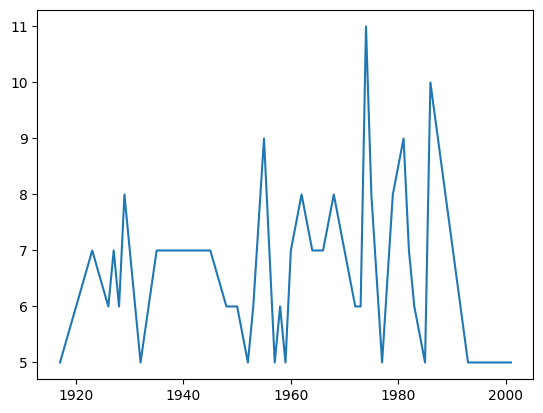

In [28]:
trace_prenom("Juline", "F")

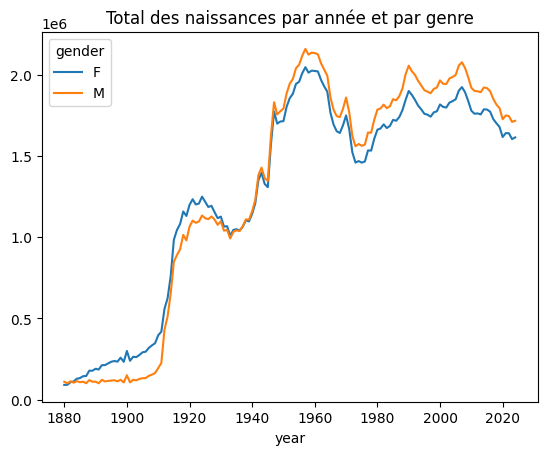

In [33]:
df.pivot_table(index="year",
               columns="gender",
               values="births",
               aggfunc="sum").plot(title="Total des naissances par année et par genre");

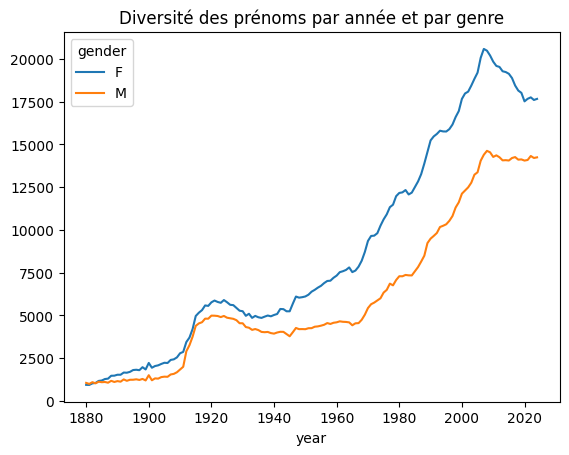

In [39]:
df.pivot_table(index="year",
               columns="gender",
               values="name",
               aggfunc="count").plot(title="Diversité des prénoms par année et par genre");

In [49]:
prenoms_top10 = df.pivot_table(index="name",
               values="births",
               aggfunc="sum").nlargest(10, "births").index.tolist()
prenoms_top10

['James',
 'John',
 'Robert',
 'Michael',
 'William',
 'Mary',
 'David',
 'Joseph',
 'Richard',
 'Charles']

In [51]:
df_top10 = df.loc[df["name"].isin(prenoms_top10)]
df_top10

,year,name,gender,births
0,1880,Mary,F,7065
228,1880,John,F,46
286,1880,William,F,30
343,1880,James,F,22
514,1880,Robert,F,12
...,...,...,...,...
2135264,2024,David,M,7317
2135265,2024,Joseph,M,7223
2135284,2024,Charles,M,5593
2135323,2024,Robert,M,3785


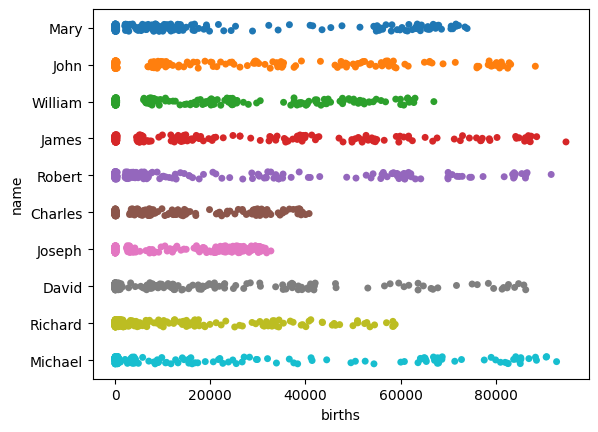

In [53]:
sns.stripplot(data=df_top10, x="births", y="name", hue="name", legend=False);

In [57]:
df.loc[df["births"].idxmax()]

year       1947
name      Linda
gender        F
births    99693
Name: 431068, dtype: object

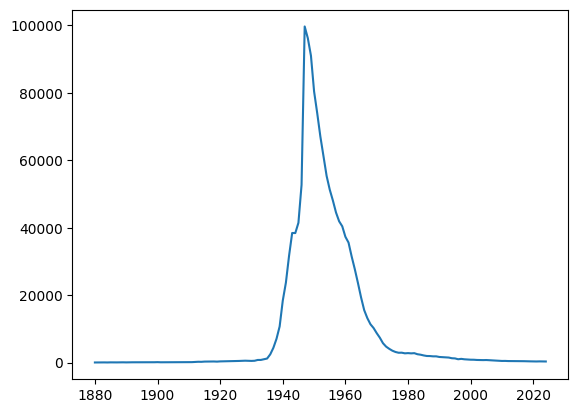

In [58]:
trace_prenom("Linda", "F")

In [59]:
df.nlargest(10, "births")

,year,name,gender,births
431068,1947,Linda,F,99693
441439,1948,Linda,F,96216
437172,1947,James,M,94763
544684,1957,Michael,M,92786
437173,1947,Robert,M,91654
451678,1949,Linda,F,91016
533215,1956,Michael,M,90691
556269,1958,Michael,M,90598
447479,1948,James,M,88604
510830,1954,Michael,M,88564
